 # HW 7
 ## ATSC 507
 ##### Christopher Rodell

In [1]:
import context
import numpy as np
from cr507.utils import plt_set
import matplotlib.pyplot as plt
from collections import namedtuple 
from puff_funs import Approximator





******************************
context imported. Front of path:
/Users/rodell/atsc507
/private/var/folders/hc/bh1xlzfj3_n4c5gz42dbpw400000gn/T/8179651f-a0ff-4a37-9568-14987a1f4de3
******************************

through /Users/rodell/atsc507/py/hw7/context.py -- pha
through /Users/rodell/atsc507/cr507/__init__.py pha II


 A 1-D pollutant puff "anomaly" is being advected in
 the x-direction by a constant wind u. The "anomaly" includes positive
 and negative concentration deviations about a mean concentration.
 $$
 \\
 $$
 $$
 \frac{\partial P}{\partial t}= -u_{0} \frac{\partial P}{\partial x}
 $$
 $$
 \\
 $$
  The 3 finite-difference schemes you will compare are
 - (a) FTBS - Forward in time, Backward in space;
 $$
 P_{j, n+1}=P_{j, n} -u_{0} \frac{P_{j,n}-P_{j-1,n}}{ \Delta x} \Delta t
 $$
 $$
 \\
 $$
 - (b) RK3 - - RK3 centered in space
 $$
 \\
 $$
 $$
 P_{i,n}^{*}=P_{i, n}+\frac{\Delta t}{3}\left[-u_{0} \frac{P_{i+1, n}-P_{i-1, n}}{2\Delta x}\right]
 $$
 $$
 P_{i,n}^{**}=P_{i, n}+\frac{\Delta t}{2}\left[-u_{0} \frac{P_{i+1, n}^{*}-P_{i-1, n}^{*}}{2\Delta x}\right]
 $$
 $$
 P_{i,n+1}=P_{i, n}+\Delta t\left[-u_{0} \frac{P_{i+1, n}^{**}-P_{i-1, n}^{**}}{2\Delta x}\right]
 $$
 $$
 \\
 $$
 - (c) PPM - Piecewise Parabolic Method
 where PPM is the scheme used to advect pollutants in the CMAQ model.
 $$
 \\
 $$
 *Wasnt able to find a good source defining the PPM method equation
 ...I copy-pasted your code to make the PPM plot work I wanted
  to rewrite in python but...didn't happen, sorry...The R scripted (for PPM)
 and approximator class (for RK3 and FTBS) are at the bottom of this pdf*

In [2]:

## Create the grid and initial conditions
initialVals={'gridx': 1000 , 'dx':100.  ,'dt':10. , 'u0': 5. , \
     'xx': np.arange(0,1000,1) , 'cmax': 10. }

## Call on approximator class
coeff = Approximator(initialVals)




 - 1) Calculate and display the Courant number.  You can display it in the
 graph in the question (3) if you would like.
 $$
 \\
 $$
 $$
 C=\frac{u \Delta t}{\Delta x} \leq C_{\max }
 $$

In [3]:
print("Courant number  ", coeff.cr)


Courant number   0.5


 - 2) (a) Create initial concentration anomaly distribution in the x-direction
    *See def__init__() in Approximator class*
 $$
 \\
 $$
 - (b) Plot (using blue colour) the initial concentration distribution on a graph.

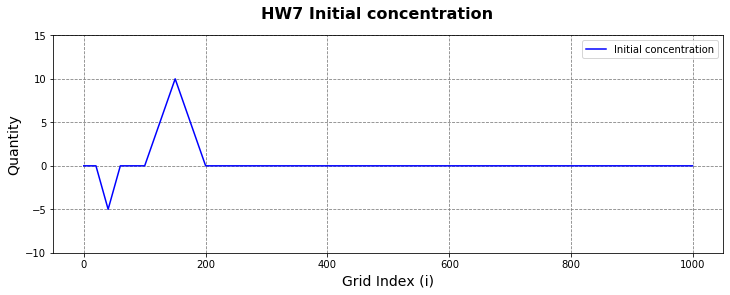

In [4]:

## Plot With initial concentration in blue
plot = coeff.plot_functions('Initial')



 3) Also, on the same plot, show (in red) the ideal exact final solution,
 after the puff anomaly has been advected downwind, as given by
    *See def__init__() in Approximator class*

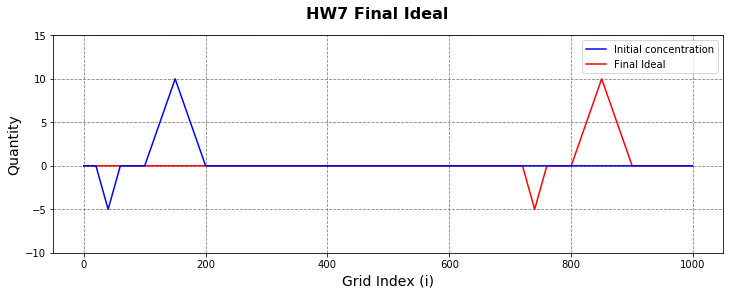

In [5]:
## Plot With final concentration in red
plot = coeff.plot_functions('Final')



 4) Advect the concentration puff anomaly for the following number of time steps
 and plot (in green) the resulting concentration on the same graph, using
 $$
 \\
 $$
 ### Plot Forward in time backward in space

(1400, 1000)
(1400, 1000)


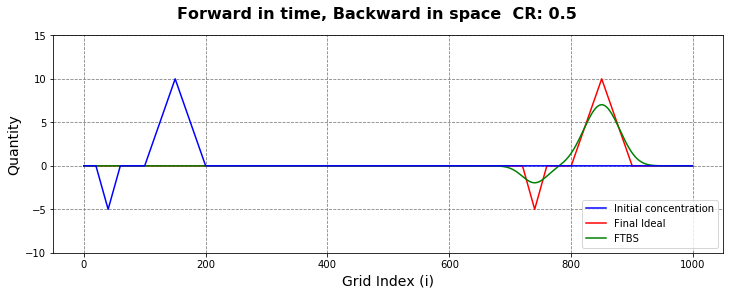

In [6]:

## Plot Forward in time backward in space
plot = coeff.plot_functions('FTBS')



 ### Plot RK3 centered in space solution

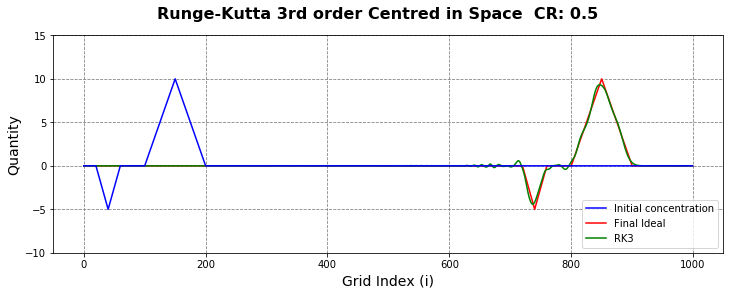

In [7]:

## Plot RK3 centered in space solution
plot = coeff.plot_functions('RK3')



 ### Plot PPM centered in space solution
 *PNG made using hw7_ppm.R*
 <img src="files/PPM.png">

 - 7) Discuss and compare the results of these three advection schemes.
 Of the three schemes, the PPM performed best. The PPM scheme was
 meant to handle a sharp curve/gradient associated with pollutant
 advection. The forward in time centered in space performed the
  worst and had significant damping or reduction in the concentration
  levels. RK3 faired well but showed signs of instability around
  the sharp curves/gradients.